# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pyarrow as pa
import pyarrow.parquet as pq
import random

from scipy.fftpack import fft2, fftshift
from scipy.ndimage import label, sum_labels

import model as mdl
import agent as agt
import visualisation as vis
import sensitivity_analysis as sa

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1. Model Setup

In [11]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from '/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/visualisation.py'>

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

0


/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

1


/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

2


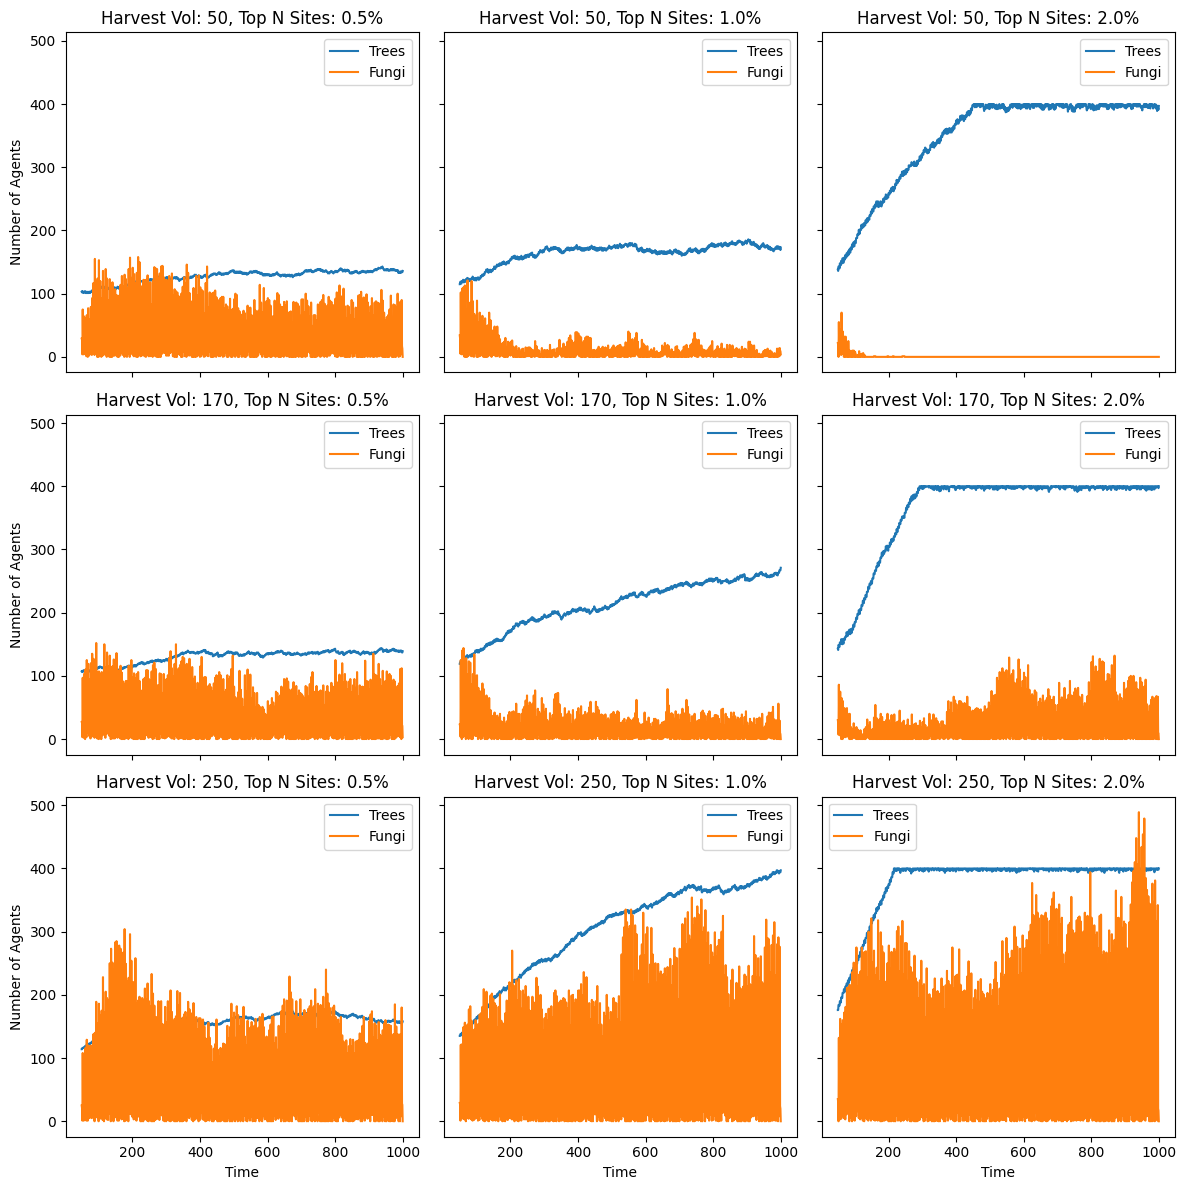

In [19]:
%matplotlib inline

width = 20
height = 20
n_init_trees = 100
n_init_fungi = 50
fert_comp_ratio_exponent = 0.5
top_n_sites_percent_values = [0.005, 0.01, 0.02]
harvest_volume_values = [50, 170, 250]
max_substrate=3
max_soil_fertility=1

# Initialize the model and run it for each combination of parameters
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

for i, top_n_sites_percent in enumerate(top_n_sites_percent_values):
    for j, harvest_volume in enumerate(harvest_volume_values):
        # Update the harvest parameters
        harvest_params = [harvest_volume, 4, 0.5]
        
        # Create and run the model
        model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent, 
                           max_substrate, max_soil_fertility, top_n_sites_percent)
        model.run_model(n_steps=1000)
        
        # Collect the data
        data = model.datacollector.get_model_vars_dataframe()
        
        # # Plot the data
        # ax = axes[j, i]
        # data["Trees_div10"] = data["Trees"] / 10
        # data[["Trees_div10", "Fungi"]].plot(ax=ax)
        # ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        # ax.set_xlabel('Time')
        # ax.set_ylabel('Number of Agents')
        # if j == 2:
        #     ax.legend(["Trees/10", "Fungi"])
        # else:
        #     ax.legend().set_visible(False)

        # Plot the data
        ax = axes[j, i]
        data[["Trees", "Fungi"]].iloc[50:].plot(ax=ax)
        ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Agents')
        
    print(i)

plt.tight_layout()
plt.show()

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:54: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/ABM/agent-based-modelling/Project/model.py:58: UserWarning: Default value 1 (int) might not be best suitable wi

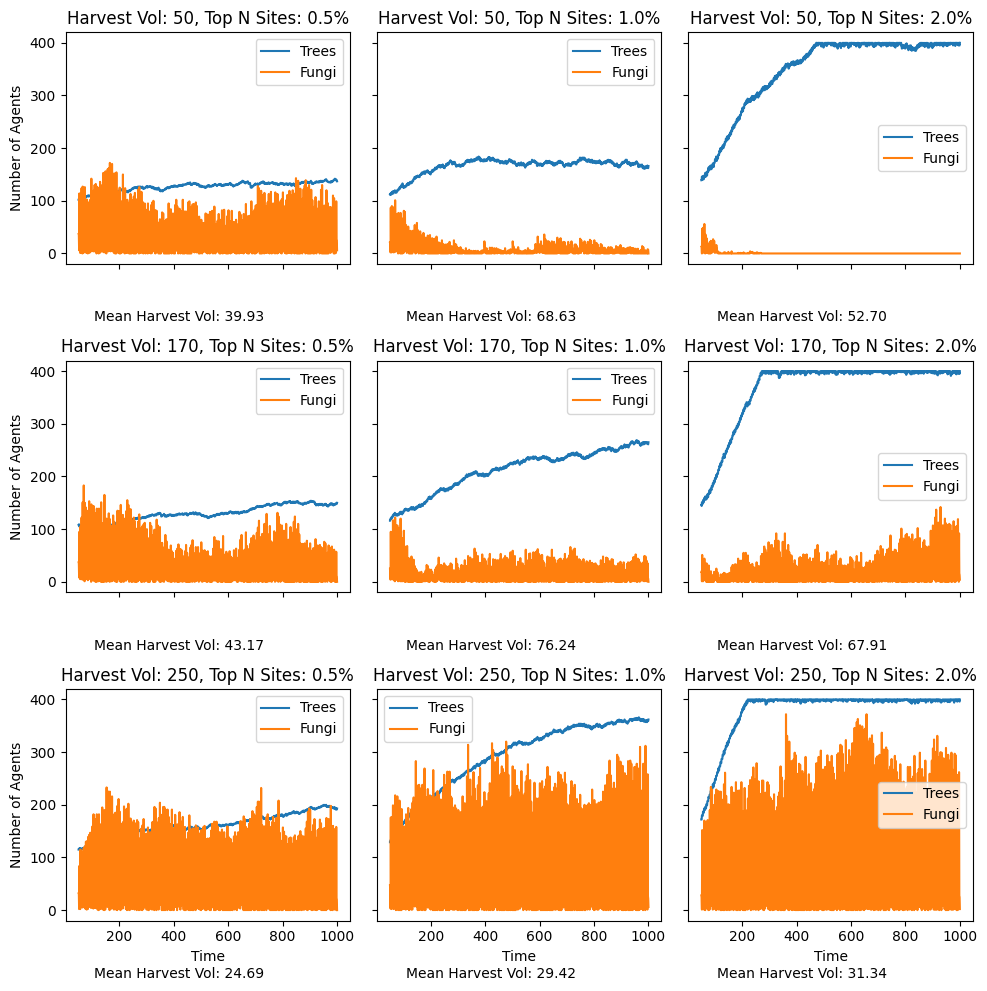

In [26]:


# Initialize the model and run it for each combination of parameters
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)

for i, top_n_sites_percent in enumerate(top_n_sites_percent_values):
    for j, harvest_volume in enumerate(harvest_volume_values):
        # Update the harvest parameters
        harvest_params = [harvest_volume, 4, 0.5]
        
        # Create and run the model
        model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent, 
                           max_substrate, max_soil_fertility, top_n_sites_percent)        
        model.run_model(n_steps=1000)
        
        # Collect the data
        data = model.datacollector.get_model_vars_dataframe()
        
        # Calculate the mean and standard deviation of harvested volume
        harvested_volume_mean = data["Harvested volume"].mean()
        # harvested_volume_std = data["Harvested volume"].std()
        
        # Plot the data starting from the 50th time step
        ax = axes[j, i]
        data[["Trees", "Fungi"]].iloc[50:].plot(ax=ax)
        ax.set_title(f'Harvest Vol: {harvest_volume}, Top N Sites: {top_n_sites_percent * 100}%')
        ax.set_xlabel('Time')
        ax.set_ylabel('Number of Agents')
        
        # Print the mean and standard deviation below the plot
        textstr = '\n'.join((
            f'Mean Harvest Vol: {harvested_volume_mean:.2f}',
        ))
        ax.text(0.4, -0.2, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')

plt.tight_layout()
plt.show()

In [43]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [44]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 100,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 20,
    "height": 20,
    "harvest_params": [150,4,0.5],
    "fert_comp_ratio_exponent": -0.3,
    "top_n_sites_percent": 0.01
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume",
                                                                  "Infected Trees", "Mean Substrate", "Mean Soil Fertility"])

page

Cannot show ipywidgets in text

## 2. Sensitivity Analysis

In [3]:
reload(mdl)
reload(sa)
reload(agt)
reload(vis)

reload(mdl)
reload(sa)
reload(agt)
reload(vis)

<module 'visualisation' from 'd:\\MSc Computational Science\\S02P03\\Agent Based Modelling\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

In [5]:
problem = {
    'num_vars': 5,
    'names': ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'fert_comp_ratio_exponent', 'top_n_sites_percent'],
    'bounds': [[50, 300],
               [0, 8],
               [0, 1],
               [-1, 1],
               [0, 1]]
}

outputs = ["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume", "Infected Trees", "Mean Substrate", "Mean Soil Fertility"]

# Random seed (CHANGE WHEN RUNNING A DIFFERENT BATCH!)
seed = 42

data = sa.run_batches(mdl.Forest, problem , outputs=outputs, n_max_timesteps=1000, n_replicates=20, n_distinct_samples=64, seed=seed)

In [150]:
print(data.head(2405))
data

      RunId  Step  harvest_volume  harvest_nbrs  harvest_prob  \
0         0     0         73.4375             3       0.46875   
1         0     1         73.4375             3       0.46875   
2         0     2         73.4375             3       0.46875   
3         0     3         73.4375             3       0.46875   
4         0     4         73.4375             3       0.46875   
...     ...   ...             ...           ...           ...   
2400      2   398         73.4375             3       0.46875   
2401      2   399         73.4375             3       0.46875   
2402      2   400         73.4375             3       0.46875   
2403      2   401         73.4375             3       0.46875   
2404      2   402         73.4375             3       0.46875   

      fert_comp_ratio_exponent  top_n_sites_percent  Trees  Fungi  \
0                       0.3125              0.28125    100     50   
1                       0.3125              0.28125     87     34   
2           

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,fert_comp_ratio_exponent,top_n_sites_percent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,73.4375,3,0.46875,0.3125,0.28125,100,50,14816.000000,0,0.9600,0.490744,0.000000,0
1,0,1,73.4375,3,0.46875,0.3125,0.28125,87,34,12385.463083,0,0.9100,0.157996,2517.968927,0
2,0,2,73.4375,3,0.46875,0.3125,0.28125,84,40,12043.905199,4,0.8975,0.123697,402.936310,0
3,0,3,73.4375,3,0.46875,0.3125,0.28125,81,20,11539.859875,3,0.8925,0.109213,561.462438,0
4,0,4,73.4375,3,0.46875,0.3125,0.28125,191,17,11438.508666,2,0.8975,0.109711,271.212897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720715,29,996,167.1875,0,0.34375,0.9375,0.65625,400,2,4894.077018,36,0.0175,0.163329,0.000000,719
720716,29,997,167.1875,0,0.34375,0.9375,0.65625,399,63,4932.847384,36,0.0350,0.158405,0.000000,719
720717,29,998,167.1875,0,0.34375,0.9375,0.65625,398,13,5015.709453,36,0.0075,0.180033,0.000000,719
720718,29,999,167.1875,0,0.34375,0.9375,0.65625,395,12,4930.562857,36,0.0150,0.167786,168.987742,719


In [5]:
# Write parquet file
table = pa.Table.from_pandas(data)
pq.write_table(table, f'sa_results_seed_{seed}.parquet')

In [37]:
# table_read = pq.read_table(f'sa_results_1000.parquet')
# table_read = pq.read_table(f'sa_results_seed_37.parquet')
table_read = pq.read_table(f'sa_results_all.parquet')
data_read = table_read.to_pandas()
data_read

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,fert_comp_ratio_exponent,top_n_sites_percent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,55.859375,3,0.820312,0.671875,0.648438,100,50,13751.000000,0,1.0100,0.487769,0.000000,0
1,0,1,55.859375,3,0.820312,0.671875,0.648438,80,34,10569.759921,0,0.9500,0.177334,3312.968217,0
2,0,2,55.859375,3,0.820312,0.671875,0.648438,80,45,10649.989006,11,0.9275,0.143895,0.000000,0
3,0,3,55.859375,3,0.820312,0.671875,0.648438,80,27,10720.647941,11,0.9025,0.140196,0.000000,0
4,0,4,55.859375,3,0.820312,0.671875,0.648438,339,21,11048.021320,11,0.8975,0.125871,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063035,29,996,133.984375,1,0.070312,-0.171875,0.539062,400,0,4292.504569,36,0.0150,0.067852,0.000000,23039
23063036,29,997,133.984375,1,0.070312,-0.171875,0.539062,397,38,4338.369712,36,0.0250,0.064197,0.000000,23039
23063037,29,998,133.984375,1,0.070312,-0.171875,0.539062,394,9,4166.230177,36,0.0275,0.082564,154.716754,23039
23063038,29,999,133.984375,1,0.070312,-0.171875,0.539062,392,5,4232.784974,36,0.0325,0.077087,0.000000,23039


In [50]:
reload(vis)
reload(vis)
reload(sa)
reload(sa)

<module 'sensitivity_analysis' from 'd:\\GitHub\\agent-based-modelling\\Project\\sensitivity_analysis.py'>

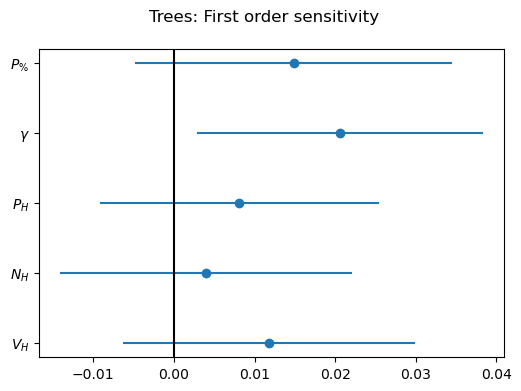

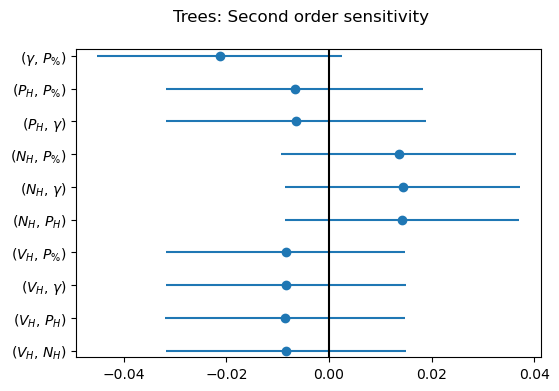

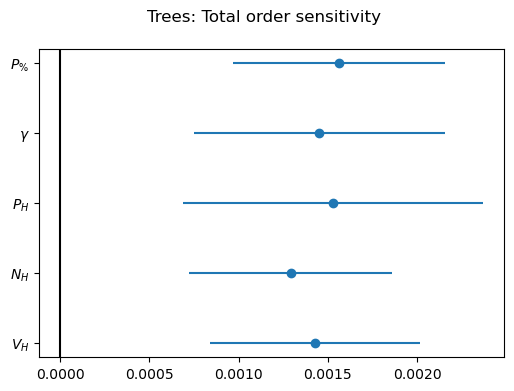

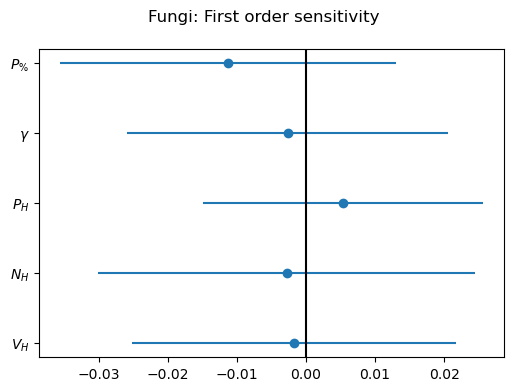

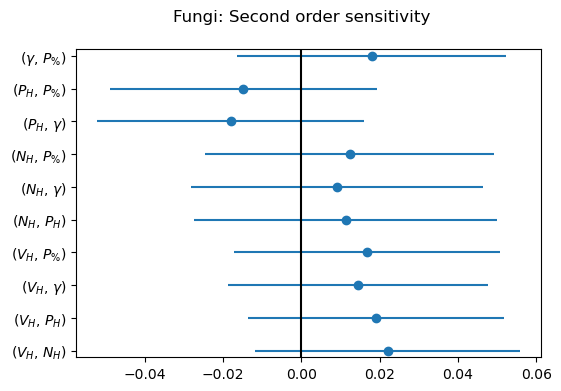

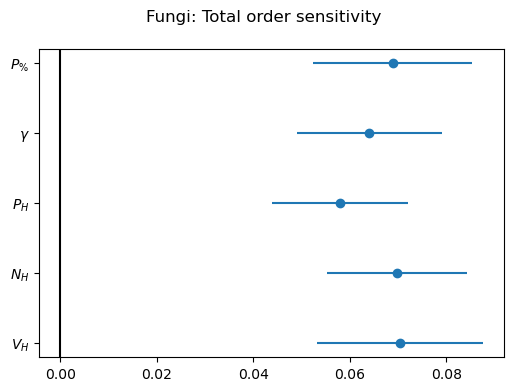

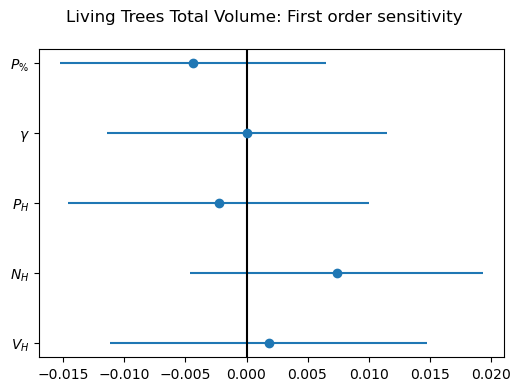

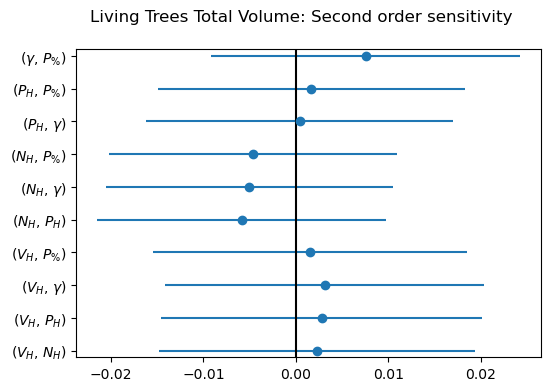

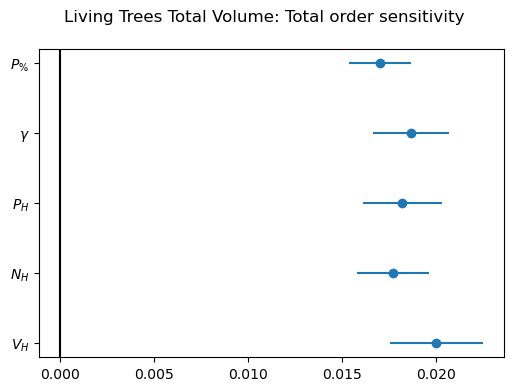

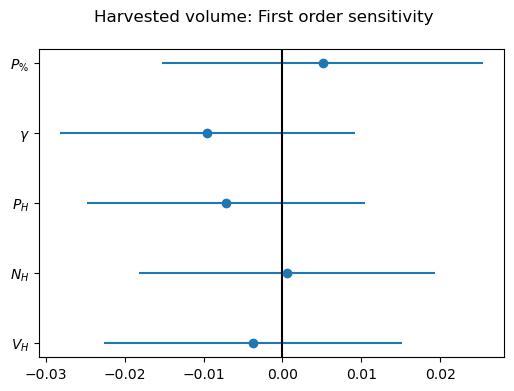

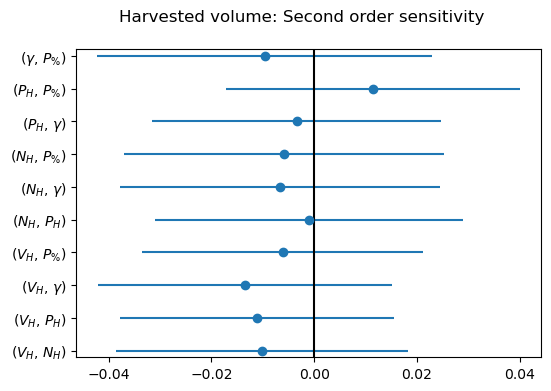

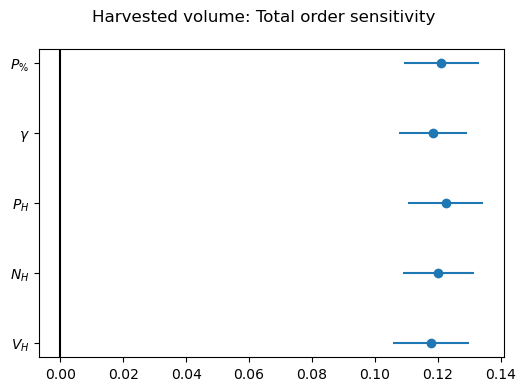

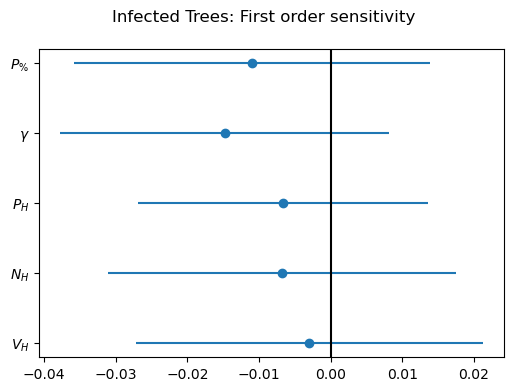

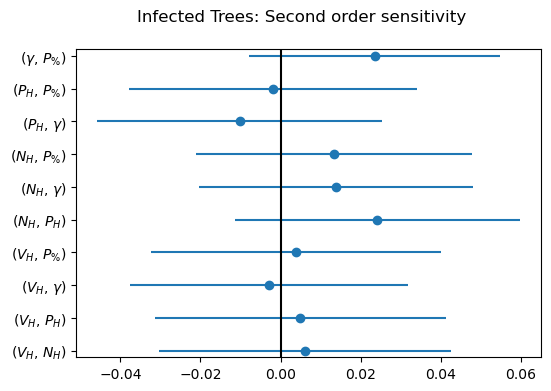

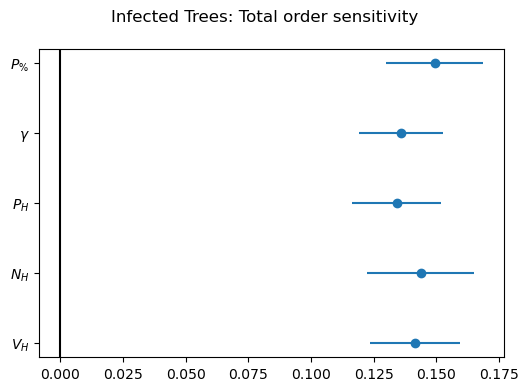

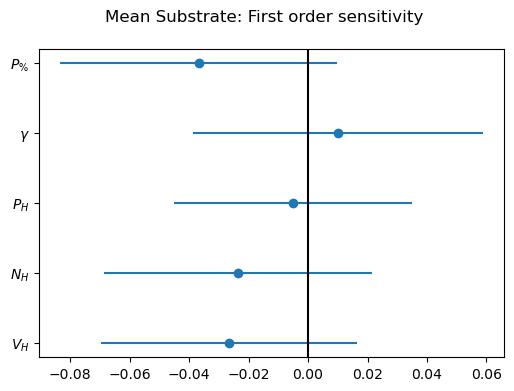

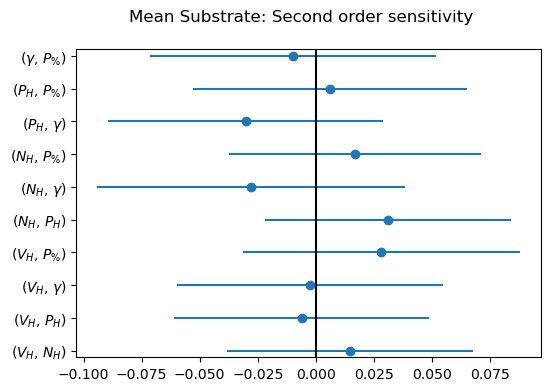

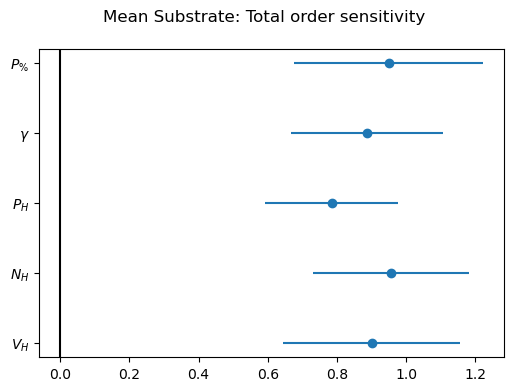

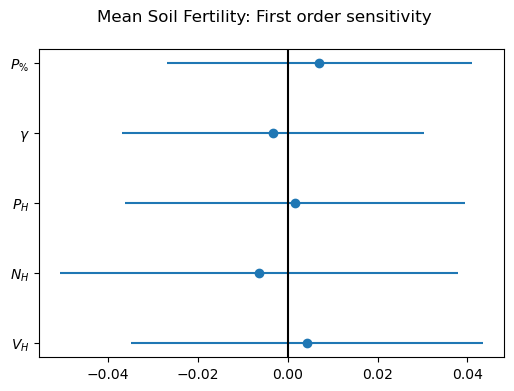

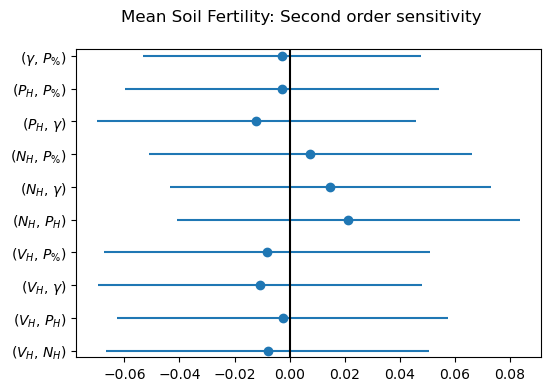

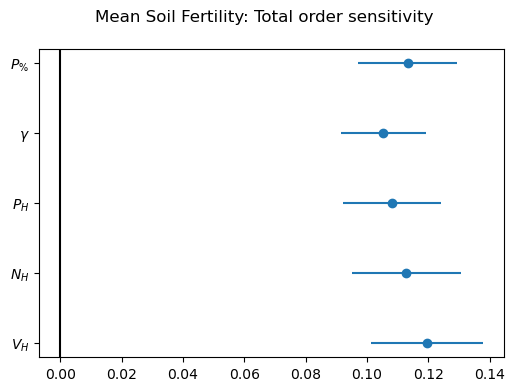

In [69]:
%matplotlib inline

si = sa.sobol_analyse(data_read, problem, outputs, mean_over_last=100)

vis.plot_index(si, problem['names'])

In [7]:
reload(vis)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

Parameter values for simulation 1000:
SimId                       1000.000000
harvest_volume               223.828125
harvest_nbrs                   7.000000
harvest_prob                   0.960938
fert_comp_ratio_exponent       0.171875
top_n_sites_percent            0.867188
Name: 0, dtype: float64


d:\GitHub\agent-based-modelling\Project\visualisation.py:124: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\GitHub\agent-based-modelling\Project\visualisation.py:134: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
d:\GitHub\agent-based-modelling\Project\visualisation.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


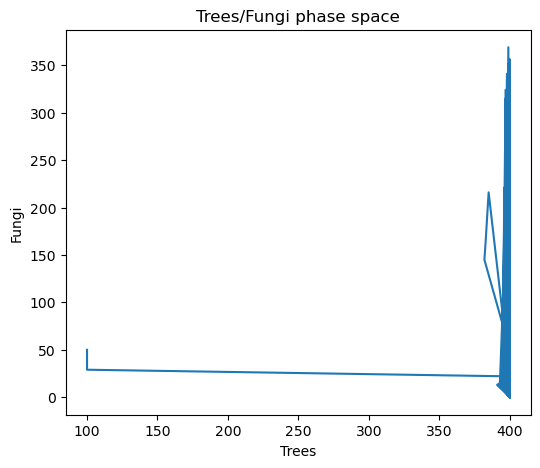

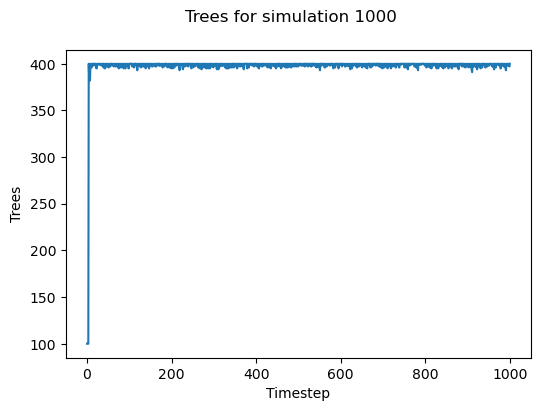

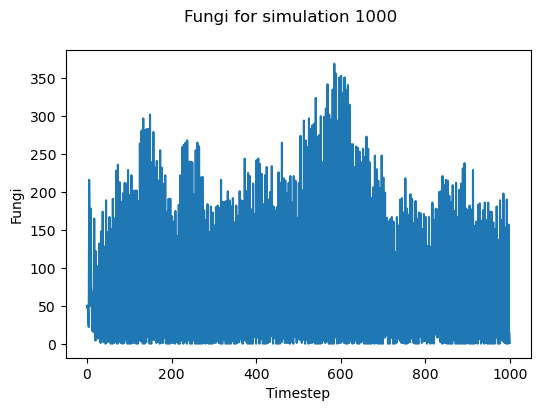

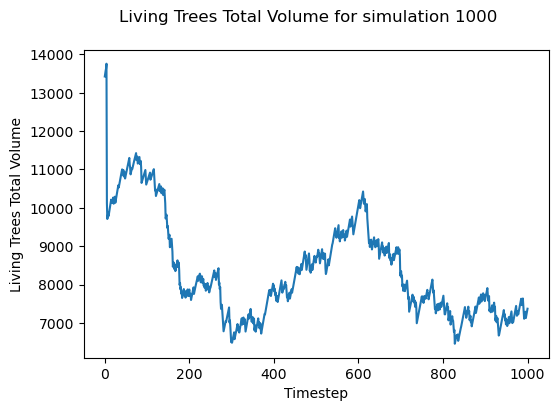

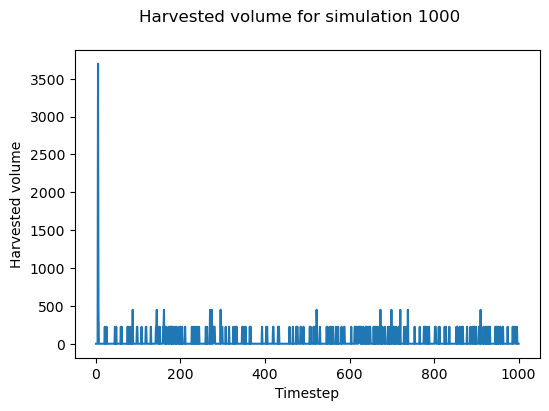

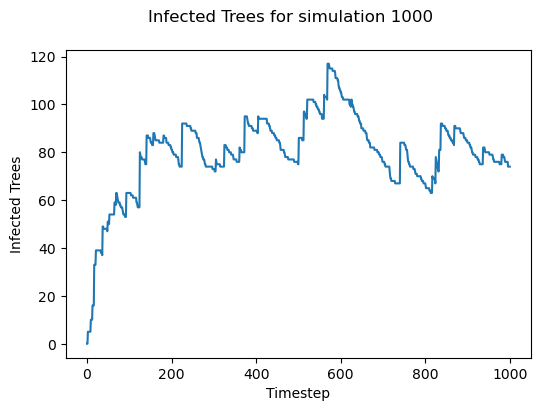

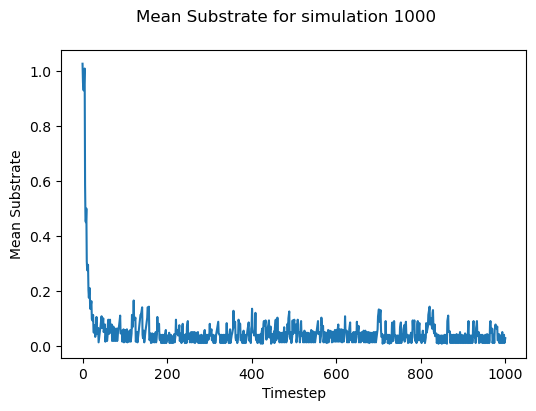

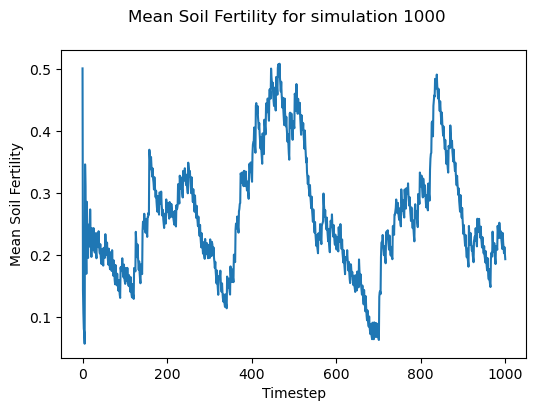

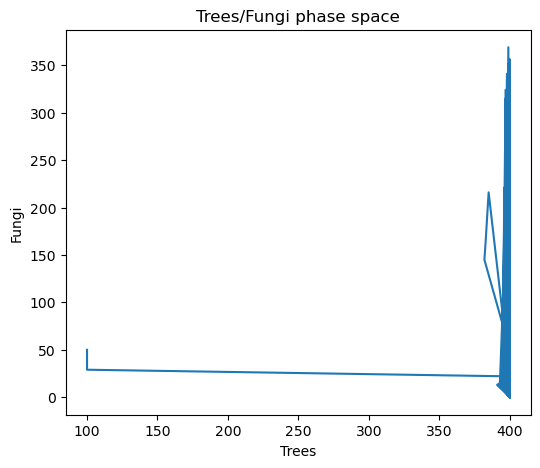

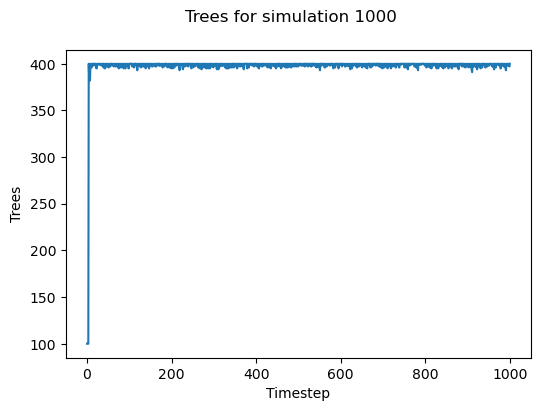

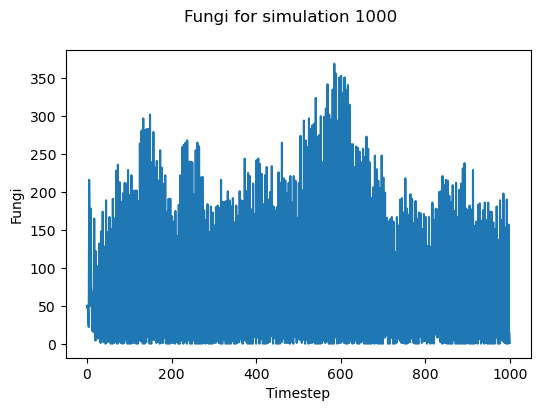

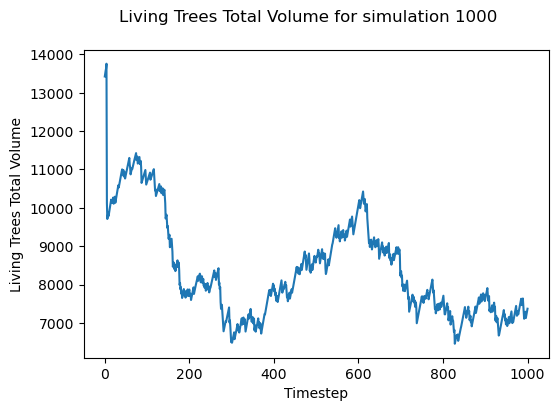

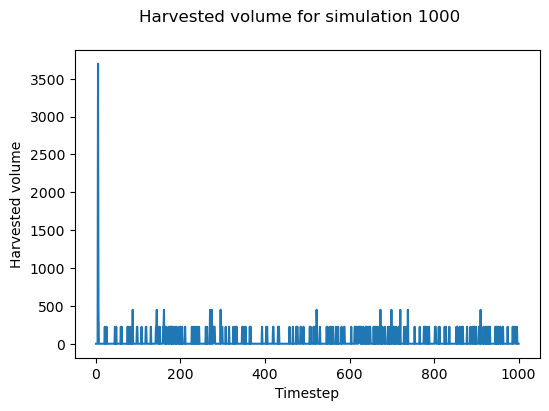

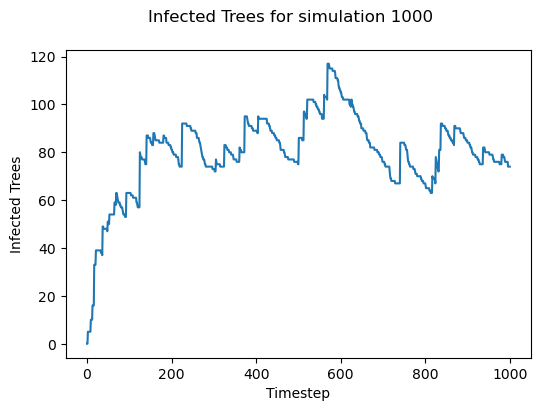

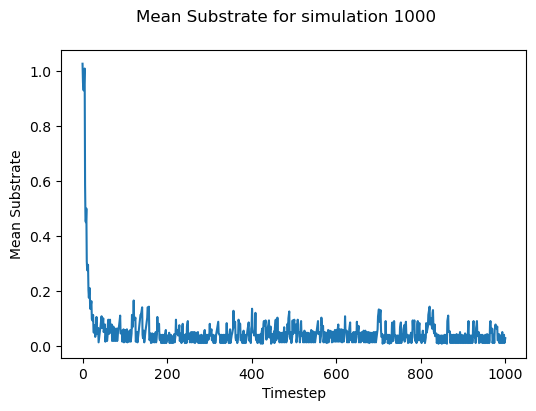

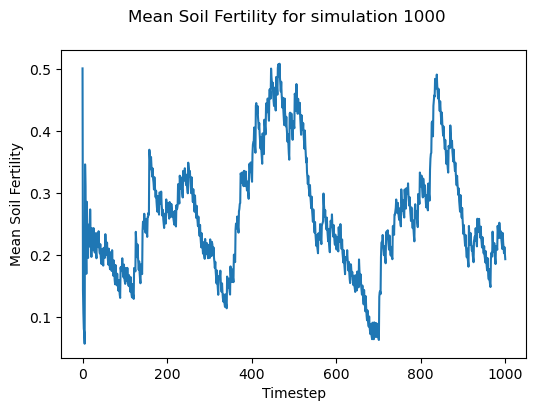

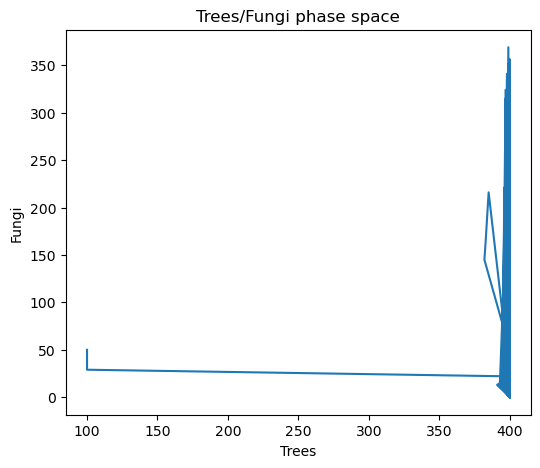

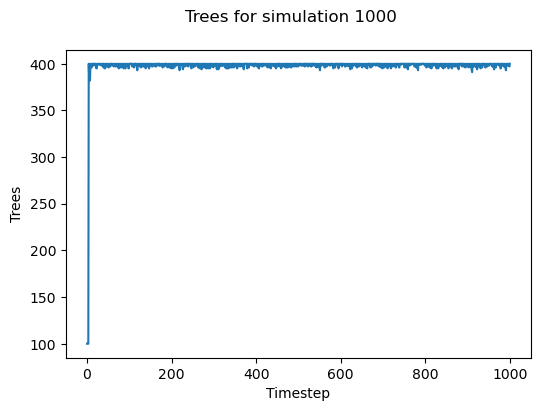

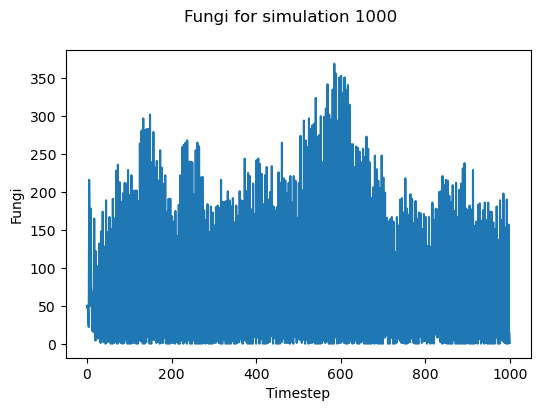

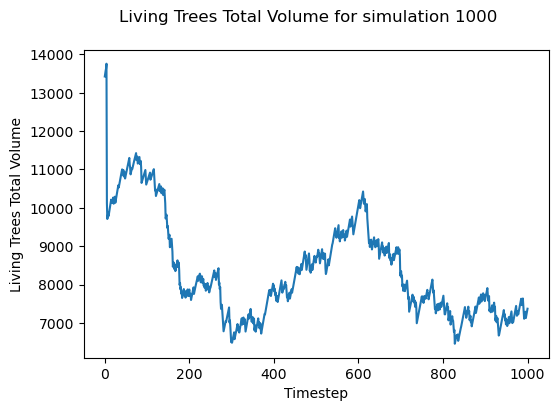

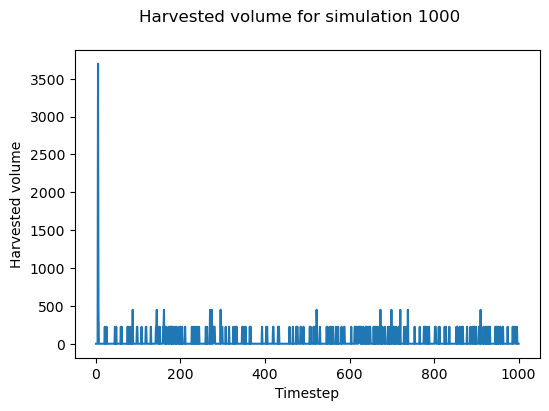

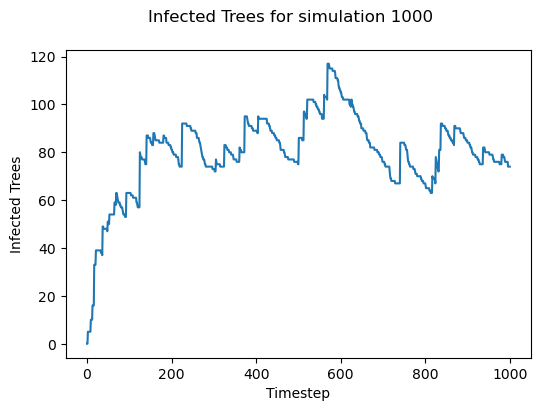

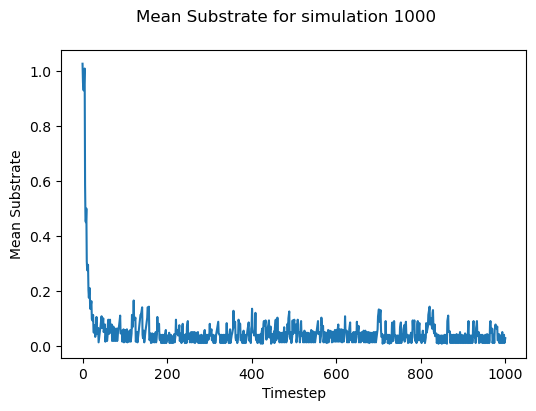

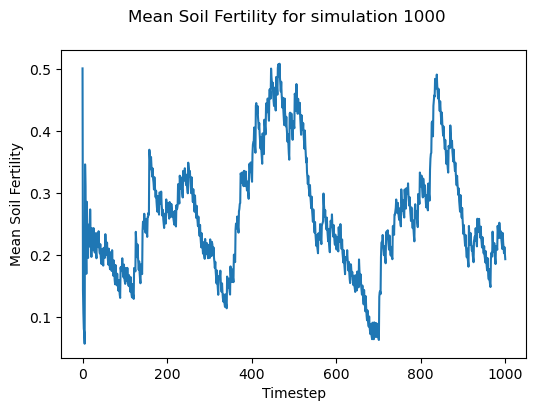

In [9]:
%matplotlib inline

vis.query_simulation_run(data_read, 1000, outputs, problem)

In [35]:
reload(vis)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

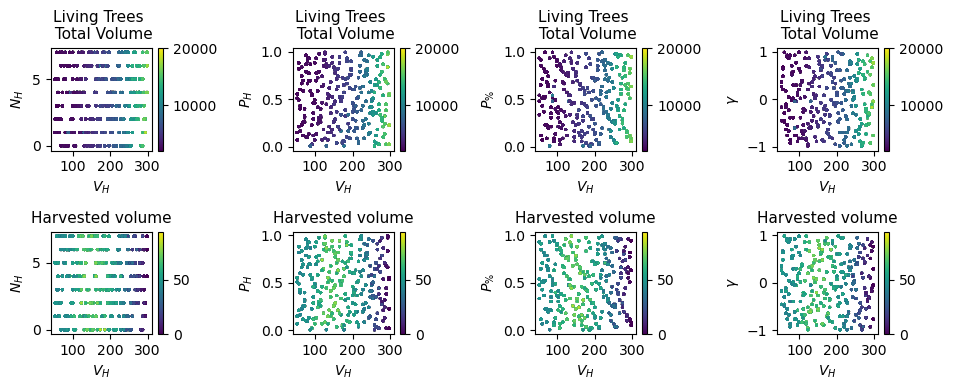

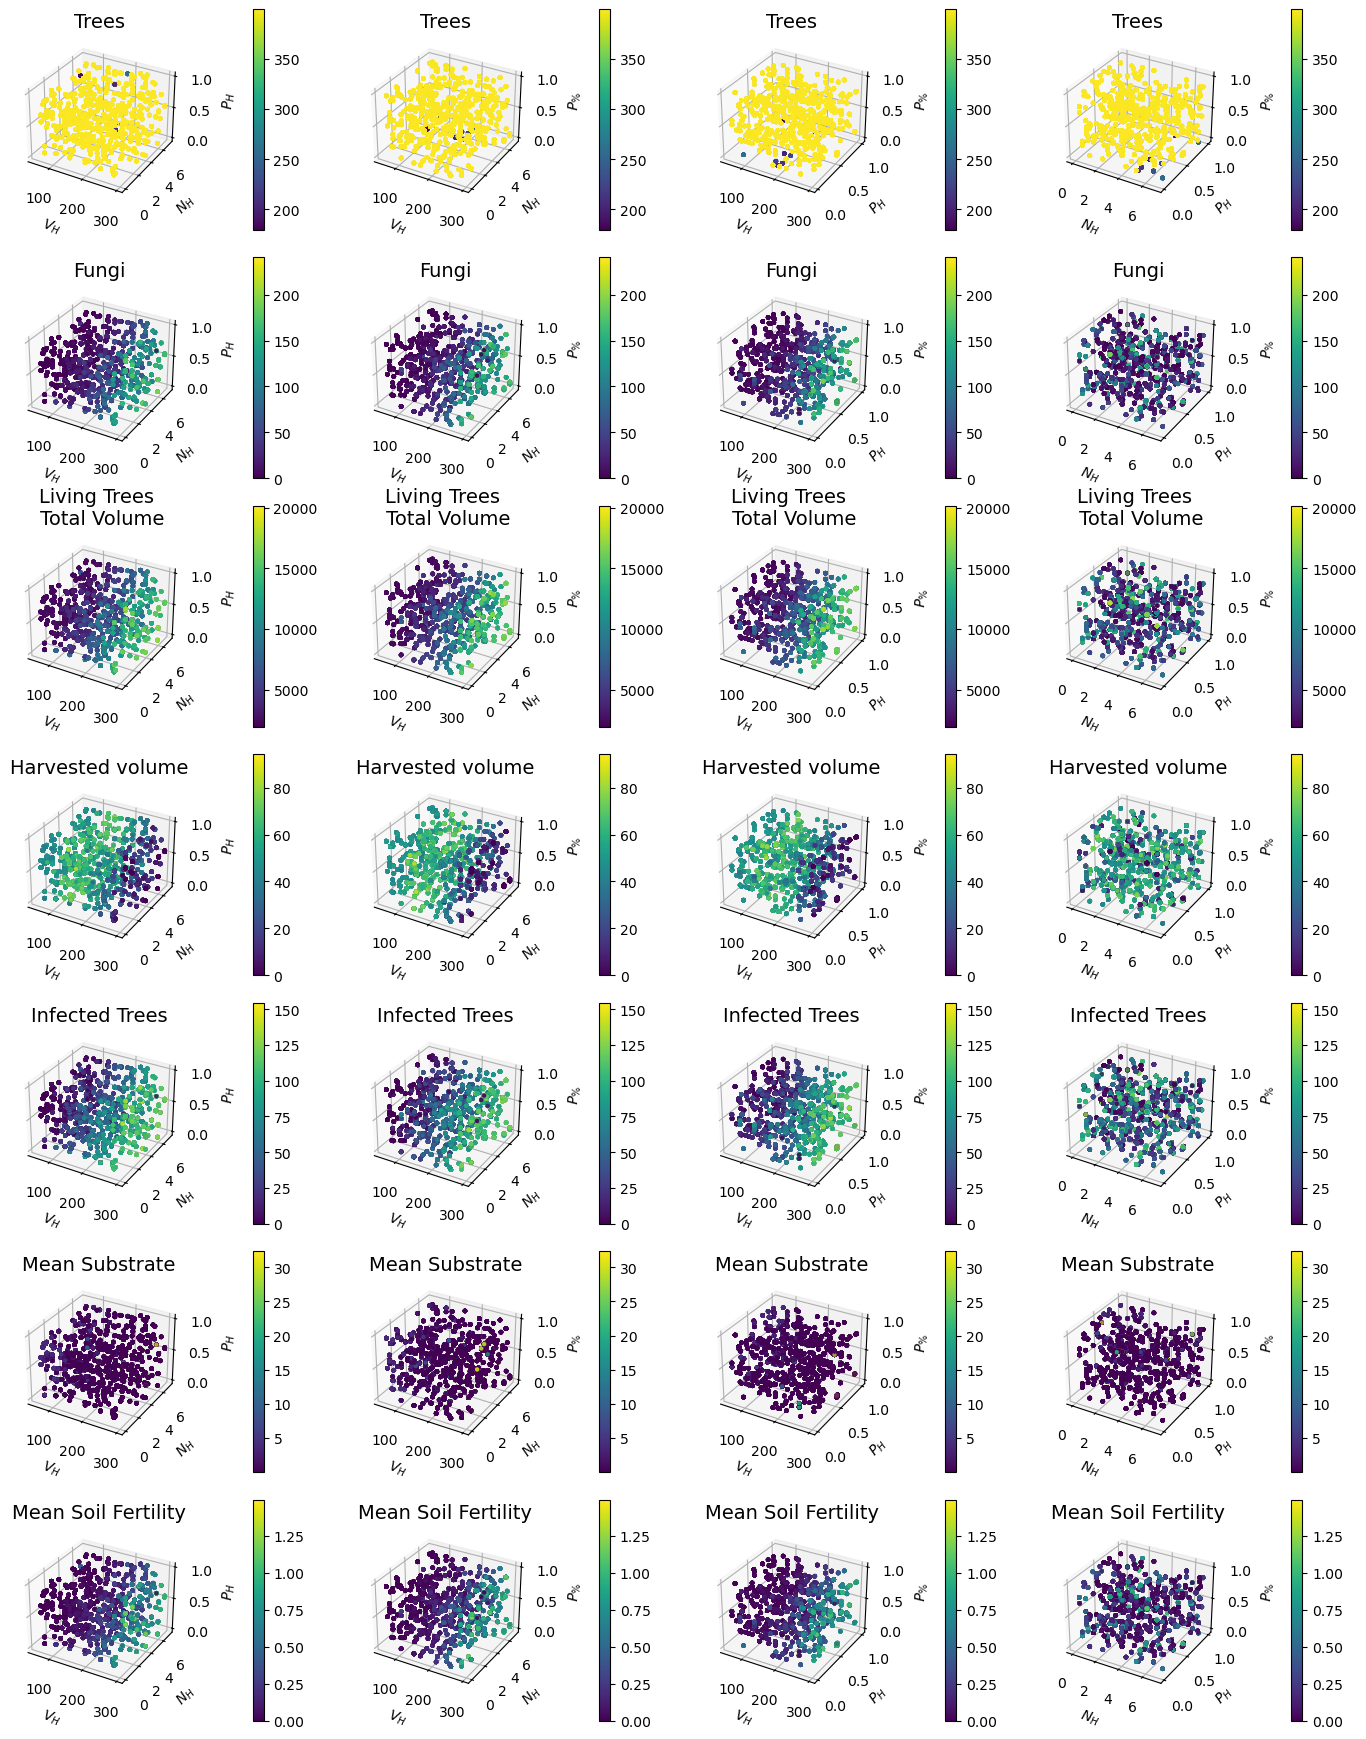

In [38]:
%matplotlib inline

vis.plot_param_space_array_2D(data_read,
                           ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'top_n_sites_percent', 'fert_comp_ratio_exponent'],
                           outputs=["Living Trees Total Volume", "Harvested volume"], show_first=4)

vis.plot_param_space_array_3D(data_read,
                           ['harvest_volume', 'harvest_nbrs', 'harvest_prob', 'top_n_sites_percent'],
                           outputs)

## 3. OFAT on $N_H$, $P_H$ and $\gamma$

In [80]:
reload(sa)
reload(sa)

<module 'sensitivity_analysis' from 'd:\\GitHub\\agent-based-modelling\\Project\\sensitivity_analysis.py'>

In [87]:
problem = {
    'num_vars': 5,
    'names': ['harvest_nbrs', 'harvest_prob', 'fert_comp_ratio_exponent'],
    'bounds': [[0, 8],
               [0, 1],
               [-1, 1]]
}

defaults = {
    'harvest_volume': 170,
    'harvest_nbrs': 4,
    'harvest_prob': 0.5,
    'top_n_sites_percent': 0.01,
    'fert_comp_ratio_exponent': 0.5
}

outputs = ["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume", "Infected Trees", "Mean Substrate", "Mean Soil Fertility"]

# Random seed (CHANGE WHEN RUNNING A DIFFERENT BATCH!)
seed = 66

data = sa.run_ofat_batches(mdl.Forest, problem, defaults, outputs=outputs, n_max_timesteps=1000, n_replicates=20, n_distinct_samples=16, seed=seed)

64.58% done


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
data

,RunId,Step,harvest_volume,harvest_nbrs,harvest_prob,top_n_sites_percent,fert_comp_ratio_exponent,Trees,Fungi,Living Trees Total Volume,Infected Trees,Mean Substrate,Mean Soil Fertility,Harvested volume,SimId
0,0,0,170,0.0,0.5,0.01,0.5,100,50,13156.000000,0,1.4600,0.493934,0.000000,0
1,0,1,170,0.0,0.5,0.01,0.5,82,43,9437.808338,0,1.3625,0.173246,3843.529351,1
2,0,2,170,0.0,0.5,0.01,0.5,74,49,7830.000494,5,1.3250,0.146365,1697.286814,2
3,0,3,170,0.0,0.5,0.01,0.5,70,34,7018.861445,5,1.3125,0.136873,894.321717,3
4,0,4,170,0.0,0.5,0.01,0.5,73,26,6860.231220,5,1.3050,0.129070,244.698636,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,96,170,4.0,0.5,0.01,1.0,134,3,8756.072666,35,0.0600,0.698679,0.000000,201
1208,1,97,170,4.0,0.5,0.01,1.0,132,122,8332.399551,37,0.1200,0.693640,246.825346,202
1209,1,98,170,4.0,0.5,0.01,1.0,131,30,8189.050662,36,0.0525,0.744815,190.704752,203
1210,1,99,170,4.0,0.5,0.01,1.0,131,26,8234.435637,36,0.0475,0.739673,0.000000,204


In [ ]:
# Write parquet file
table = pa.Table.from_pandas(data)
pq.write_table(table, f'ofat_results_seed_{seed}.parquet')

## 4. Tree Volume Distribution

In [19]:
%matplotlib inline

width = 20
height = 20
n_init_trees = 100
n_init_fungi = 50
fert_comp_ratio_exponent = 0.5
top_n_sites_percent_values = [0.005, 0.01, 0.02]
harvest_volume_values = [50, 170, 250]
max_substrate=3
max_soil_fertility=1

seed = 13
n_runs = 2#0

np.random.seed(seed)
random.seed(seed)

# Initialize the model and run it for each combination of parameters
fig, axes = plt.subplots(9, 3, figsize=(8, 15))#, sharex=True, sharey=True)

for i, top_n_sites_percent in enumerate(top_n_sites_percent_values):
    for j, harvest_volume in enumerate(harvest_volume_values):
        
        # Update the harvest parameters
        harvest_params = [harvest_volume, 4, 0.5]
        # harvest_params = [harvest_volume, 6, 0.75]

        aggregated_volumes = np.zeros((n_runs, width * height * 100))
        aggregated_vol_diffs = np.zeros((n_runs, ((width - 1) * height + width * (height - 1)) * 100))
        aggregated_spectra = np.zeros((n_runs, width, height))
        last_volumes = np.zeros((n_runs, width, height))
        
        cluster_sizes = []

        for n in range(n_runs):

            print(f"Run {n+1} of {n_runs} for $V_H$: {harvest_volume}, $P_\%$: {top_n_sites_percent * 100}%")
            
            # Create and run the model
            model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio_exponent, 
                            max_substrate, max_soil_fertility, top_n_sites_percent)        
            model.run_model(n_steps=1000)
            
            # Collect the data
            volumes = model.grid_volume_tracker[-100:]
            aggregated_volumes[n] = volumes.flatten()
            last_volumes[n] = volumes[-1]

            # Determine cluster sizes of volumes larger than the mean
            mean_volumes = np.mean(volumes, axis=(1,2))
            # print(mean_volumes)
            # large_vol_tags = np.where(volumes > mean_volumes[:, np.newaxis, np.newaxis], 1, 0)
            large_vol_tags = np.where(volumes > 50, 1, 0)
            
            for tags in large_vol_tags:
                volume_labels, num_features = label(tags)
                volume_labels_large = np.unique(volume_labels[tags])
                cluster_sizes.extend(sum_labels(volume_labels, volume_labels, index=volume_labels_large))

            # Perform 2D FFT on the volume data
            vol_fft = fft2(volumes)
            mag_spectrum = np.abs(fftshift(vol_fft, axes=(1, 2)))
            mag_spectrum = np.where(mag_spectrum > 5000, 5000, mag_spectrum)
            aggregated_spectra[n] = np.mean(mag_spectrum, axis=0)
            
            vol_diffs_h = np.abs(volumes[:, :, 1:] - volumes[:, :, :-1])
            vol_diffs_v = np.abs(volumes[:, 1:, :] - volumes[:, :-1, :])
            vol_diffs = np.concatenate((vol_diffs_h.flatten(), vol_diffs_v.flatten()), axis=0)
            aggregated_vol_diffs[n] = vol_diffs

        # Plot a histogram of the aggregated volumes
        ax = axes[j*3, i]
        aggregated_volumes = aggregated_volumes.flatten()
        aggregated_volumes = aggregated_volumes[aggregated_volumes != 0]
        ax.hist(aggregated_volumes, bins=20, density=True)
        ax.set_title(f'$V_H$: {harvest_volume}, $P_\%$: {top_n_sites_percent * 100}%')
        ax.set_xlabel('Tree Volume Distribution')
        ax.set_yscale('log')
        ax.set(xlim=(0, 300), ylim=(0.00001, 1))
        ax.grid(True)

        # Plot a histogram of the aggregated volume differences
        
        # img = ax.imshow(last_volumes[-1], cmap='plasma')
        # img = ax.imshow(np.mean(aggregated_spectra, axis=0), cmap='plasma')
        # ax.set_title("Tree Volumes Sample\nat $t=1000$", fontsize=11)
        # ax.set_title("Mean FFT Spectrum Magnitudes", fontsize=11)
        # ax.set_yscale('linear')
        # fig.colorbar(img, ax=ax)

        # Plot a histogram of the above average volume cluster sizes
        ax = axes[j*3+1, i]
        ax.hist(cluster_sizes, bins=20, density=True, color='lightblue')
        ax.set_xlabel('Cluster Size')
        ax.set(xlim=(0, 50), ylim=(0, 0.5))
        ax.grid(True)
        # ax.hist(aggregated_vol_diffs.flatten(), bins=20, density=True, color='lightblue')
        # ax.set_title(f'$V_H$: {harvest_volume}, $P_\%$: {top_n_sites_percent * 100}%')
        # ax.set_xlabel('Neighbour Volume Difference')
        # ax.set_yscale('log')
        # ax.grid(True)

        # Plot sample of tree volumes
        ax = axes[j*3+2, i]
        img = ax.imshow(last_volumes[-1], cmap='plasma')
        ax.set_title("Tree Volumes Sample\nat $t=1000$", fontsize=11)
        fig.colorbar(img, ax=ax)


plt.tight_layout()
plt.show()

Run 1 of 2 for $V_H$: 50, $P_\%$: 0.5%
Run 2 of 2 for $V_H$: 50, $P_\%$: 0.5%
Run 1 of 2 for $V_H$: 170, $P_\%$: 0.5%
Run 2 of 2 for $V_H$: 170, $P_\%$: 0.5%
Run 1 of 2 for $V_H$: 250, $P_\%$: 0.5%
Run 2 of 2 for $V_H$: 250, $P_\%$: 0.5%
Run 1 of 2 for $V_H$: 50, $P_\%$: 1.0%
Run 2 of 2 for $V_H$: 50, $P_\%$: 1.0%
Run 1 of 2 for $V_H$: 170, $P_\%$: 1.0%
Run 2 of 2 for $V_H$: 170, $P_\%$: 1.0%
Run 1 of 2 for $V_H$: 250, $P_\%$: 1.0%
Run 2 of 2 for $V_H$: 250, $P_\%$: 1.0%
